Imports e definição do dataset.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback

mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
cifar10 = tf.keras.datasets.cifar10
cifar100 = tf.keras.datasets.cifar100

print(tf.__version__)


2.12.0


c:\Users\Felipe\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


O exemplo abaixo mostra as 10 primeiras imagens de treino e teste do MNIST:

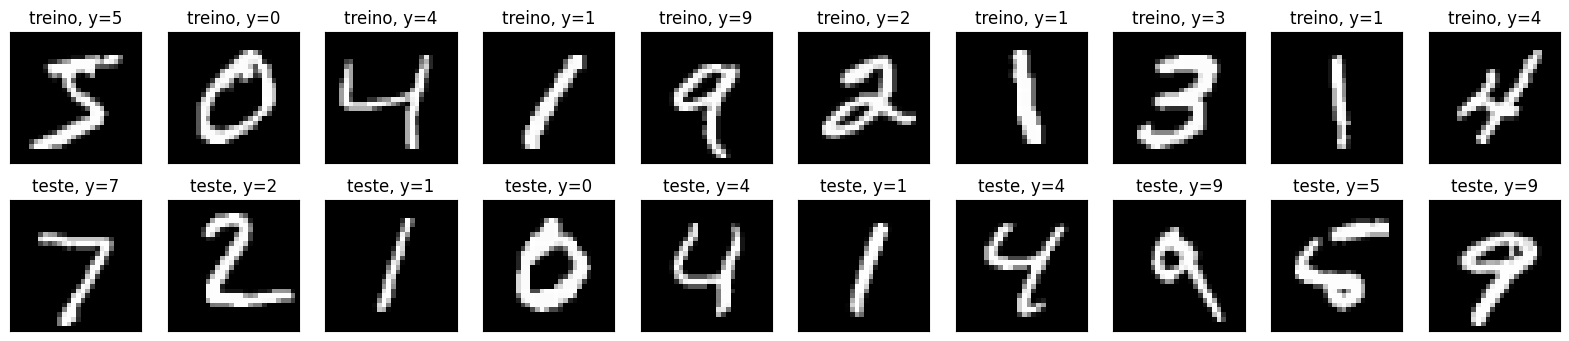

In [3]:
# mostrar as 10 primeiras imagens de treino e teste
(x_train, y_train),(x_test, y_test) = mnist.load_data()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # treino
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i])
  plt.title(f"treino, y={y_train[i]}")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # teste
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_test[i])
  plt.title(f"teste, y={y_test[i]}")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

A celula abaixo tem a definição de uma rede neural para ser usada no dataset MNIST. Você pode modifica-la como quiser (e.g. adicionar convoluções e/ou mais camadas ocultas) para melhorar o desempenho. Somente não pode modificar o número de neuronios de saida e a métrica de acurácia.



In [4]:
def get_mnist_network():
  network = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),       # 1 camada de entrada (achatando a entrada pra imagem 28x28 virar um vetor)
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) # 1 camada de saida com 10 neuronios (1 por classe)
  ])

  network.compile(optimizer='sgd',                        # otimizador SGD
                loss='sparse_categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  return network


A celula abaixo tem um exemplo de execucao da rede neural do MNIST naquele dataset. Modifique para executar por 10 épocas e adicione código para medir o tempo gasto.


In [5]:
network = get_mnist_network()                             # obtem a rede
(x_train, y_train),(x_test, y_test) = mnist.load_data()   # carrega o dataset
network.fit(x_train, y_train, epochs=5, verbose=0, callbacks=[TqdmCallback(verbose=2)])                   # treina a rede
loss, accuracy = network.evaluate(x_test, y_test)         # avalia a rede

100%|██████████| 1.88k/1.88k [00:01<00:00, 1.11kbatch/s, loss=316, accuracy=0.841]
100%|██████████| 1.88k/1.88k [00:01<00:00, 1.23kbatch/s, loss=259, accuracy=0.868]
100%|██████████| 1.88k/1.88k [00:01<00:00, 1.27kbatch/s, loss=251, accuracy=0.874]
100%|██████████| 1.88k/1.88k [00:01<00:00, 1.21kbatch/s, loss=249, accuracy=0.875]
100%|██████████| 1.88k/1.88k [00:01<00:00, 1.16kbatch/s, loss=242, accuracy=0.878]
100%|██████████| 5/5 [00:07<00:00,  1.60s/epoch, loss=242, accuracy=0.878]


313/313 [==============================] - 0s 816us/step - loss: 192.4369 - accuracy: 0.9071


## Tarefa

Escreva código para executar redes neurais nos seguintes datasets:
- MNIST (pode aproveitar o codigo existente)
- Fashion MNIST
- CIFAR-10
- CIFAR-100

Cada execução deve ser por 10 épocas.

Você deve preencher as funções a seguir para retornarem a rede neural com a melhor configuração que você conseguiu para cada dataset (a do MNIST deve ser feita na `get_mnist_network()` acima).

IMPORTANTE: as funções não devem TREINAR nem AVALIAR  as redes neurais, apenas instancia-las e retorna-las.

Ao final, preencha o dict `results` com o desempenho encontrado em cada execução.

In [6]:
#TODO: implement specific networks for each dataset (with convolutional layers)
import time
def get_mnist_network():
  
  network = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),    # 1 camada de convolução: 16 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
      tf.keras.layers.Conv2D(8, (3,3), activation='relu'),                               # 1 camada de convolução:8 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                  # max pooling 2x2
      tf.keras.layers.Flatten(),                                                        # achatar p/ entrar em MLP
      tf.keras.layers.Dense(10, activation='softmax')                                   # 1 camada de saida com 10 neuronios
  ])

  network.compile(optimizer='rmsprop',                        # otimizador SGD
                loss='sparse_categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  return network

def get_fashion_mnist_network():
  network = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),    # 1 camada de convolução: 16 filtros 3x3
    tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),                              # 1 camada de convolução: 8 filtros 3x3
    tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
    tf.keras.layers.Flatten(),                                                        # achatar p/ entrar em MLP
    tf.keras.layers.Dense(10, activation='softmax')                                   # 1 camada de saida com 10 neuronios
  ])

  network.compile(optimizer='rmsprop',                        # otimizador SGD
                loss='sparse_categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  return network

def get_cifar10_network():
  network = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)),    # 1 camada de convolução: 16 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             # 1 camada de convolução: 32 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
      tf.keras.layers.Flatten(),                                                        # achatar p/ entrar em MLP
      tf.keras.layers.Dense(128, activation='sigmoid'),                                 # 1 camada escondida com 128 neuronios                                
      tf.keras.layers.Dense(10, activation='softmax')                                   # 1 camada de saida com 10 neuronios
  ])

  network.compile(optimizer='rmsprop',                        # otimizador SGD
                loss='sparse_categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  return network

def get_cifar100_network():
  network = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)),    # 1 camada de convolução: 16 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             # 1 camada de convolução: 32 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
      tf.keras.layers.Flatten(),                                                        # achatar p/ entrar em MLP
      tf.keras.layers.Dense(128, activation='sigmoid'),                                 # 1 camada escondida com 128 neuronios                                
      tf.keras.layers.Dense(100, activation='softmax')                                  # 1 camada de saida com 10 neuronios
  ])

  network.compile(optimizer='rmsprop',                        # otimizador SGD
                loss='sparse_categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  return network

def evaluate_network(network, dataset, epochs=10, normalize=False, max_value=255.0):
  (train_images, train_labels), (test_images, test_labels) = dataset.load_data() # carrega o dataset 

  # se normalize=True, normaliza as imagens dividindo pelo valor maximo (default 255 pra pixel com cor)
  if(normalize):
    train_images, test_images = train_images / max_value, test_images / max_value

  start_time = time.time()
  network.fit(train_images, train_labels, epochs=epochs, verbose=0, callbacks=[TqdmCallback(verbose=2)])  # treina a rede
  trainning_time = time.time() - start_time
  loss, accuracy = network.evaluate(test_images, test_labels)         # avalia a rede
  return loss, accuracy, trainning_time



## Teste das redes

### Mnist

In [7]:
minst_network = get_mnist_network()      # obtem a rede
mnist_loss, mnist_acc, mnist_time = evaluate_network(minst_network, mnist)   # avalia a rede

100%|██████████| 1.88k/1.88k [00:10<00:00, 176batch/s, loss=0.891, accuracy=0.884]
100%|██████████| 1.88k/1.88k [00:09<00:00, 192batch/s, loss=0.113, accuracy=0.968]
100%|██████████| 1.88k/1.88k [00:09<00:00, 192batch/s, loss=0.0863, accuracy=0.975]
100%|██████████| 1.88k/1.88k [00:10<00:00, 187batch/s, loss=0.0791, accuracy=0.977]
100%|██████████| 1.88k/1.88k [00:09<00:00, 192batch/s, loss=0.0718, accuracy=0.979]
100%|██████████| 1.88k/1.88k [00:09<00:00, 191batch/s, loss=0.0663, accuracy=0.981]
100%|██████████| 1.88k/1.88k [00:09<00:00, 193batch/s, loss=0.0648, accuracy=0.981]
100%|██████████| 1.88k/1.88k [00:09<00:00, 189batch/s, loss=0.0626, accuracy=0.982]
100%|██████████| 1.88k/1.88k [00:09<00:00, 191batch/s, loss=0.0613, accuracy=0.982]
100%|██████████| 1.88k/1.88k [00:09<00:00, 193batch/s, loss=0.0594, accuracy=0.983]
100%|██████████| 10/10 [01:38<00:00,  9.89s/epoch, loss=0.0594, accuracy=0.983]


313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9797


### Fashion Mnist

In [8]:
fashion_minst_network = get_fashion_mnist_network()      # obtem a rede
fmnist_loss, fmnist_acc, fmnist_time = evaluate_network(fashion_minst_network, fashion_mnist)   # avalia a rede

100%|██████████| 1.88k/1.88k [00:09<00:00, 191batch/s, loss=1.27, accuracy=0.732]
100%|██████████| 1.88k/1.88k [00:09<00:00, 195batch/s, loss=0.536, accuracy=0.813]
100%|██████████| 1.88k/1.88k [00:09<00:00, 194batch/s, loss=0.482, accuracy=0.829]
100%|██████████| 1.88k/1.88k [00:09<00:00, 194batch/s, loss=0.453, accuracy=0.84]
100%|██████████| 1.88k/1.88k [00:09<00:00, 195batch/s, loss=0.427, accuracy=0.849]
100%|██████████| 1.88k/1.88k [00:09<00:00, 194batch/s, loss=0.413, accuracy=0.853]
100%|██████████| 1.88k/1.88k [00:09<00:00, 193batch/s, loss=0.404, accuracy=0.857]
100%|██████████| 1.88k/1.88k [00:09<00:00, 194batch/s, loss=0.399, accuracy=0.858]
100%|██████████| 1.88k/1.88k [00:09<00:00, 191batch/s, loss=0.398, accuracy=0.859]
100%|██████████| 1.88k/1.88k [00:09<00:00, 190batch/s, loss=0.393, accuracy=0.86]
100%|██████████| 10/10 [01:37<00:00,  9.71s/epoch, loss=0.393, accuracy=0.86]


313/313 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8538


### CIFAR 10

In [9]:
cifar10_network = get_cifar10_network()
c10_loss, c10_acc, c10_time = evaluate_network(cifar10_network, cifar10, normalize=True)

100%|██████████| 1.56k/1.56k [00:13<00:00, 112batch/s, loss=1.62, accuracy=0.417]
100%|██████████| 1.56k/1.56k [00:13<00:00, 119batch/s, loss=1.26, accuracy=0.552]
100%|██████████| 1.56k/1.56k [00:12<00:00, 122batch/s, loss=1.12, accuracy=0.605]
100%|██████████| 1.56k/1.56k [00:12<00:00, 120batch/s, loss=1.02, accuracy=0.641]
100%|██████████| 1.56k/1.56k [00:12<00:00, 127batch/s, loss=0.947, accuracy=0.667]
100%|██████████| 1.56k/1.56k [00:12<00:00, 122batch/s, loss=0.884, accuracy=0.689]
100%|██████████| 1.56k/1.56k [00:13<00:00, 113batch/s, loss=0.829, accuracy=0.712] 
100%|██████████| 1.56k/1.56k [00:12<00:00, 122batch/s, loss=0.777, accuracy=0.729]
100%|██████████| 1.56k/1.56k [00:12<00:00, 127batch/s, loss=0.732, accuracy=0.746]
100%|██████████| 1.56k/1.56k [00:12<00:00, 126batch/s, loss=0.69, accuracy=0.761]
100%|██████████| 10/10 [02:09<00:00, 12.93s/epoch, loss=0.69, accuracy=0.761]


313/313 [==============================] - 1s 3ms/step - loss: 1.0093 - accuracy: 0.6586


### CIFAR 100

In [10]:
cifar100_network = get_cifar100_network()
c100_loss, c100_acc, c100_time = evaluate_network(cifar100_network, cifar100, normalize=True)

100%|██████████| 1.56k/1.56k [00:13<00:00, 114batch/s, loss=3.95, accuracy=0.104]
100%|██████████| 1.56k/1.56k [00:12<00:00, 126batch/s, loss=3.35, accuracy=0.203]
100%|██████████| 1.56k/1.56k [00:12<00:00, 127batch/s, loss=3.05, accuracy=0.257]
100%|██████████| 1.56k/1.56k [00:12<00:00, 125batch/s, loss=2.85, accuracy=0.296]
100%|██████████| 1.56k/1.56k [00:13<00:00, 120batch/s, loss=2.7, accuracy=0.327]
100%|██████████| 1.56k/1.56k [00:12<00:00, 121batch/s, loss=2.58, accuracy=0.349]
100%|██████████| 1.56k/1.56k [00:12<00:00, 126batch/s, loss=2.48, accuracy=0.373]
100%|██████████| 1.56k/1.56k [00:13<00:00, 119batch/s, loss=2.39, accuracy=0.392]
100%|██████████| 1.56k/1.56k [00:13<00:00, 118batch/s, loss=2.3, accuracy=0.409] 
100%|██████████| 1.56k/1.56k [00:13<00:00, 119batch/s, loss=2.23, accuracy=0.425]
100%|██████████| 10/10 [02:08<00:00, 12.89s/epoch, loss=2.23, accuracy=0.425]


313/313 [==============================] - 1s 3ms/step - loss: 2.6933 - accuracy: 0.3454


Preencha o dict abaixo substituindo os None com a acuracia final (acc) e o tempo de treinamento (time) encontrado no seu experimento pra cada dataset

In [11]:
results = {
    "mnist": {"time": mnist_time, "acc": mnist_acc},
    "fashion_mnist": {"time": fmnist_time, "acc": fmnist_acc},
    "cifar10": {"time": c10_time, "acc": c10_acc},
    "cifar100": {"time": c100_time, "acc": c100_acc},
}

print(f'''
mnist = {results["mnist"]}
fashion_mnist = {results["fashion_mnist"]}
cifar10 = {results["cifar10"]}
cifar100 = {results["cifar100"]}
''')


mnist = {'time': 98.96884083747864, 'acc': 0.9797000288963318}
fashion_mnist = {'time': 97.1551947593689, 'acc': 0.8537999987602234}
cifar10 = {'time': 130.59433317184448, 'acc': 0.6585999727249146}
cifar100 = {'time': 129.25107789039612, 'acc': 0.34540000557899475}

